In [39]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import yfinance as yf

In [40]:
tickers = ["AAPL", "AMZN", "COIN", "GOOG", "IBM", "META", "MSFT", "NVDA", "SPY", "TSLA"]

historical_prices = None

for t in tickers:
    ticker = yf.Ticker(t)
    history =  ticker.history(period="2y")

    monthly_prices = history['Close'].resample('ME').last()

    if historical_prices is None:
        historical_prices = monthly_prices
    else:
        historical_prices = pd.concat([historical_prices, monthly_prices], axis=1)

historical_prices.columns = tickers
historical_prices.index = pd.to_datetime(historical_prices.index).strftime("%Y-%m")

historical_prices

,AAPL,AMZN,COIN,GOOG,IBM,META,MSFT,NVDA,SPY,TSLA
Date,,,,,,,,,,
2023-08,186.047684,138.009995,79.599998,136.538406,137.342163,294.275604,322.894012,49.324650,438.673950,258.079987
2023-09,169.549286,127.120003,75.080002,131.070908,131.234100,298.571991,311.062286,43.475834,417.865631,250.220001
2023-10,169.113541,133.089996,77.120003,124.559608,135.293671,299.626221,333.090332,40.758278,408.794373,200.839996
2023-11,188.355316,146.089996,124.720001,133.128662,149.996231,325.365021,374.042267,46.745083,446.135223,240.080002
2023-12,190.913651,151.940002,173.919998,140.097229,154.716736,352.028748,371.209137,49.499973,466.503662,248.479996
2024-01,182.851898,155.199997,128.199997,140.962112,173.740616,388.011353,392.472412,61.499634,473.933380,187.289993
2024-02,179.461258,176.759995,203.559998,138.954025,176.632385,487.972992,409.081207,79.076820,498.666504,201.880005
2024-03,170.257339,180.380005,265.119995,151.360275,182.293274,483.442993,416.083191,90.320045,514.973877,175.789993
2024-04,169.115570,175.000000,203.929993,163.667114,158.656998,428.276855,385.039124,86.367622,494.210327,183.279999


In [41]:
historical_returns = historical_prices.pct_change().dropna()
estimated_returns = historical_returns.mean().rename("return")
estimated_returns.sort_values()

,return
AAPL,0.011104
SPY,0.016871
MSFT,0.020820
GOOG,0.021148
TSLA,0.022989
AMZN,0.023604
IBM,0.027223
META,0.043204
NVDA,0.060836
COIN,0.090682


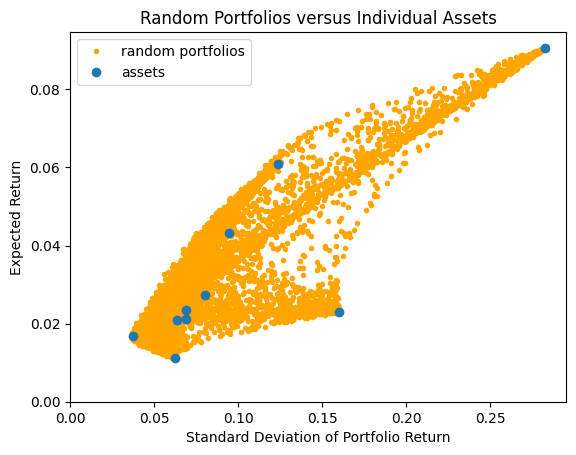

In [78]:
estimated_variances = historical_returns.var()

estimated_covariance = historical_returns.cov()

np.random.seed(704)
random_portfolios = np.random.geometric(0.01, size=(10000, len(tickers)))**5
random_portfolios = random_portfolios / random_portfolios.sum(axis=1)[:, None]

random_returns = random_portfolios @ estimated_returns
random_variances = [random_portfolios[i,:] @ estimated_covariance @ random_portfolios[i,:].T for i in range(len(random_portfolios))]

plt.plot(np.sqrt(random_variances), random_returns, label="random portfolios", linestyle="none", marker=".", color="orange")
plt.plot(np.sqrt(estimated_variances), estimated_returns, label="assets", linestyle="none", marker="o")

plt.legend()
plt.xlabel("Standard Deviation of Portfolio Return")
plt.xlim(0)
plt.ylabel("Expected Return")
plt.ylim(0)
plt.title("Random Portfolios versus Individual Assets")

plt.show();

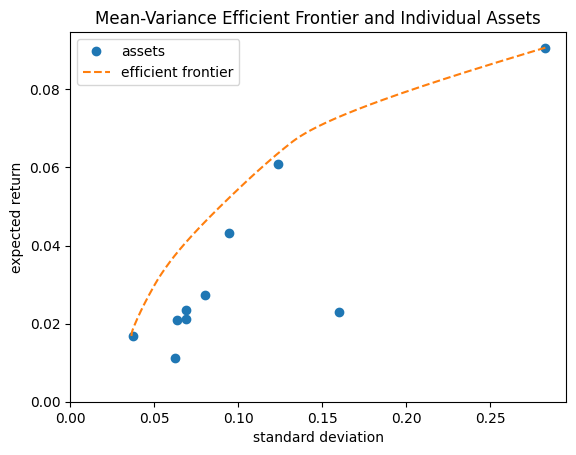

In [43]:
# minimum risk portfolio

n = len(estimated_returns)

x_minimum_risk = cp.Variable(n)

objective_minimum_risk = cp.Minimize(x_minimum_risk.T @ estimated_covariance.to_numpy() @ x_minimum_risk)
objective_minimum_risk

prob_minimum_risk = cp.Problem(objective_minimum_risk,
                               [0 <= x_minimum_risk,
                                cp.sum(x_minimum_risk) == 1])

covariance_minimum_risk = prob_minimum_risk.solve()
covariance_minimum_risk

estimated_return_minimum_risk = x_minimum_risk.value.T @ estimated_returns
estimated_return_minimum_risk

# maximum return portfolio

estimated_return_maximum_return = max(estimated_returns)

# efficient frontier

ef_variances = []
ef_returns = []
ef_portfolios = []

for r in np.linspace(estimated_return_minimum_risk, estimated_return_maximum_return, 1001):
    # create variables to optimize
    x_r = cp.Variable(n)

    # formulate linear program
    prob_r = cp.Problem(cp.Minimize(x_r.T @ estimated_covariance.to_numpy() @ x_r),
                        [0 <= x_r,
                         cp.sum(x_r) == 1,
                         x_r.T @ estimated_returns == r])
    ef_variances.append(prob_r.solve())
    ef_returns.append(r)
    ef_portfolios.append(x_r.value)

plt.plot(np.sqrt(estimated_variances), estimated_returns, label="assets", linestyle="none", marker="o")
plt.plot(np.sqrt(ef_variances), ef_returns, label="efficient frontier", linestyle="--")

plt.legend()
plt.xlabel("standard deviation")
plt.xlim(0)
plt.ylabel("expected return")
plt.ylim(0)
plt.title("Mean-Variance Efficient Frontier and Individual Assets")
plt.show();

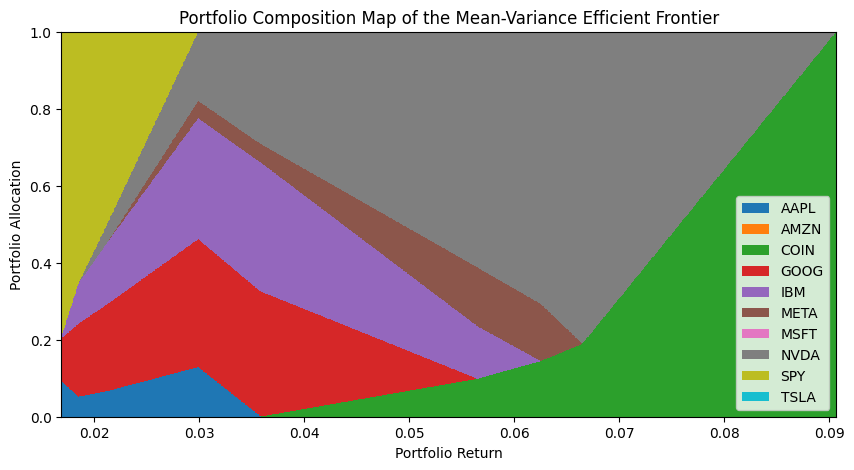

In [80]:
plt.figure(figsize=(10, 5))

ef_portfolios = np.asarray(ef_portfolios)
bottom = np.zeros(ef_portfolios.shape[0])
for (i, a) in enumerate(historical_returns.columns):
    plt.bar(x=ef_returns,
            height=ef_portfolios[:,i],
            bottom=bottom,
            label=a,
            width=(ef_returns[1] - ef_returns[0]))
    bottom += ef_portfolios[:,i]

plt.legend()
plt.xlabel("Portfolio Return")
plt.xlim(min(ef_returns), max(ef_returns))
plt.ylabel("Portfolio Allocation")
plt.ylim(0, 1)
plt.title("Portfolio Composition Map of the Mean-Variance Efficient Frontier")

plt.show();